In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [10]:
# read file in geopandas dataframe
block_gdf = gpd.read_file(r'C:\Users\subhe\Documents\dataSets\AA-I_Plot_PGN.geojson')

In [11]:
# Checking CRS of this vector dataset

print(block_gdf.crs)

None


In [12]:
# Checking sample data of geopandas dataframe
block_gdf.sample() # can pass arguments as many ex: block_gdf.sample(2)

,Id,Phase,Block,Pin_Code,Police_Stn,Plot_No,PremisesNo,Plot_Nm,BLD_Avlb,BLD_Status,Plot_Ctgry,Presnt_Lnd,Latitude,Longitude,Remarks,Date,Area_SQMT,geometry
751,752,Phase-2,DA,700156,AREA OF NEW TOWN P.S.,DA/89,02-0276,NaN,Yes,Constructed,Residential,[1]HIG CO-OPERATIVE,22.573,88.4625,NaN,2022-08-29,395.445,"MULTIPOLYGON Z (((88.46234 22.57297 0.00000, 8..."


<Axes: >

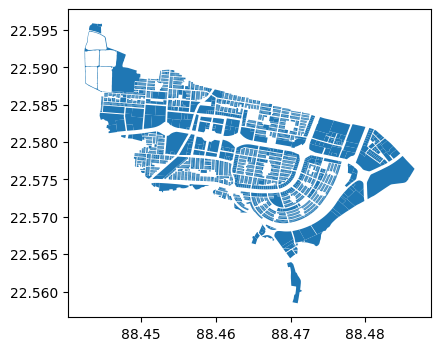

In [13]:
# Checking can we plot the data or not

block_gdf.plot(figsize = (6,4)) 

1. Create centroid for all the polygon

In [18]:
# creating centroid
block_gdf["centroid"] = block_gdf.centroid

In [26]:
block_gdf.sample()

,Id,Phase,Block,Pin_Code,Police_Stn,Plot_No,PremisesNo,Plot_Nm,BLD_Avlb,BLD_Status,Plot_Ctgry,Presnt_Lnd,Latitude,Longitude,Remarks,Date,Area_SQMT,geometry,centroid
1358,1359,Phase-2,AE,700163,AREA OF NEW TOWN P.S.,AE/130,04-0094,NaN,Yes,Constructed,Residential,[1]HIG CO-OPERATIVE,22.5865,88.4575,NaN,2022-08-29,400.064,"MULTIPOLYGON Z (((88.45761 22.58638 0.00000, 8...",POINT (88.45748 22.58646)


2. plot centroid form gdf

<Axes: >

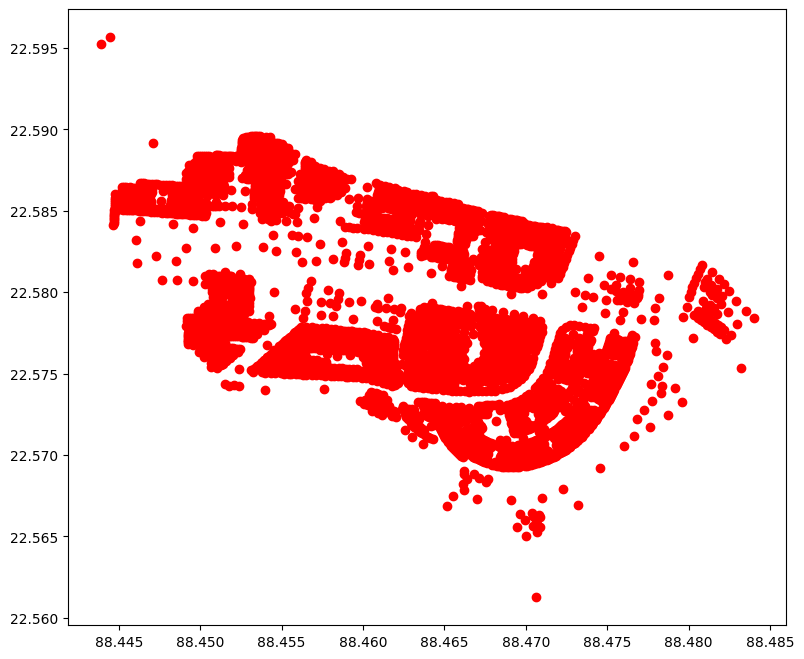

In [48]:
# Plot centroids
block_gdf["centroid"].plot(figsize = (10,8), color = 'red', marker = 'o')

3.plot polygon & point in a single plot

<Axes: title={'center': 'New Town Action Area I Block & Centroids'}, xlabel='Longitude', ylabel='Latitude'>

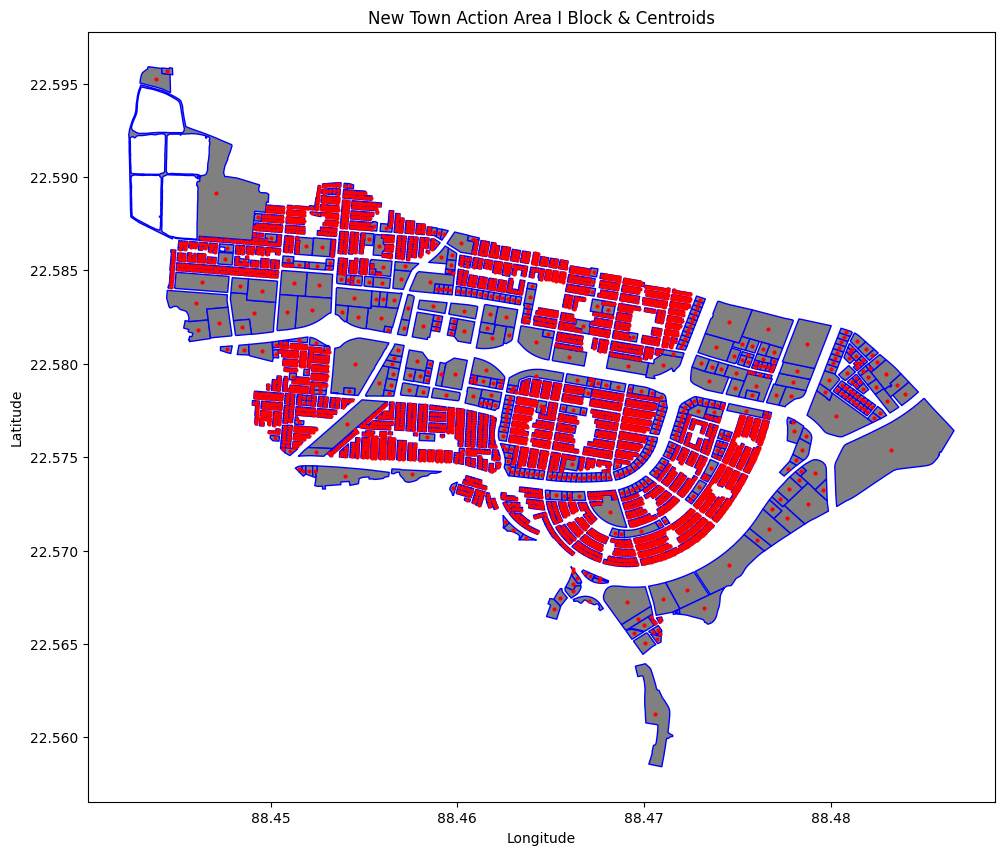

In [30]:
# Assigning figure and axis to create the plot also incluse subplot to show multiple layes

fig, axis = plt.subplots(figsize = (12,10))

# Adding polygon layer on base
block_gdf.plot(ax = axis, color = 'grey', edgecolor = 'blue')

# Adding point layer on top
block_gdf["centroid"].plot(ax = axis, color = 'r', marker = 'o', markersize = 4)

# Assigning labels on x & y axis
fig = plt.ylabel("Latitude")
fig = plt.xlabel("Longitude")

# Adding Title on top of the plot
fig = plt.title("New Town Action Area I Block & Centroids")


4. Create Area for all the polygon

In [39]:
# Assigning global crs to the dataframe (EPSG = 4326)
block_gdf_set_crs = block_gdf.set_crs(4326, inplace=True)

In [40]:
# Checking CRS
block_gdf_set_crs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
# Reprojecting global crs to Project CRS of the dataframe (EPSG = 32645)
block_gdf_to_crs = block_gdf_set_crs.to_crs(32645, inplace=True)

In [46]:
# Calculating area_in_sqmeter and set decimal values upto 2 place
block_gdf["area"] = block_gdf.area.round(2)

In [50]:
# Checking result
block_gdf.sample()

,Id,Phase,Block,Pin_Code,Police_Stn,Plot_No,PremisesNo,Plot_Nm,BLD_Avlb,BLD_Status,...,Presnt_Lnd,Latitude,Longitude,Remarks,Date,Area_SQMT,geometry,centroid,area_in_sqm,area
0,1,Phase-2,CD,700156,AREA OF NEW TOWN P.S.,CD/91,08-0264,NaN,Yes,Constructed,...,[3] LIG CO-OPERATIVE,22.5748,88.4645,NaN,2022-08-29,275.097,MULTIPOLYGON Z (((650567.197 2497182.363 0.000...,POINT (88.46446 22.57480),2.416169e-11,275.10
1,2,Phase-2,CE,700156,AREA OF NEW TOWN P.S.,CE/1/C/89,04-0204,NaN,Yes,Constructed,...,WEST BENGAL HOUSING BOARD,22.5758,88.4608,NaN,2022-08-29,394.439,MULTIPOLYGON Z (((650195.101 2497299.319 0.000...,POINT (88.46081 22.57576),3.464386e-11,394.44
2,3,Phase-2,CD,700156,AREA OF NEW TOWN P.S.,CD/101,17-0211,NaN,Yes,Constructed,...,[3] LIG CO-OPERATIVE,22.5753,88.4643,NaN,2022-08-29,269.666,MULTIPOLYGON Z (((650541.998 2497236.899 0.000...,POINT (88.46426 22.57532),2.368482e-11,269.67
3,4,Phase-2,CB,700156,AREA OF NEW TOWN P.S.,CB/162,49-0199,NaN,Yes,Constructed,...,[2] MIG CO-OPERATIVE,22.5773,88.4684,NaN,2022-08-29,330.547,MULTIPOLYGON Z (((650954.965 2497479.276 0.000...,POINT (88.46840 22.57726),2.903228e-11,330.55
4,5,Phase-2,CB,700156,AREA OF NEW TOWN P.S.,CB/57,27-0254,NaN,Yes,Constructed,...,[2] MIG CO-OPERATIVE,22.5762,88.4654,NaN,2022-08-29,330.606,MULTIPOLYGON Z (((650660.344 2497356.656 0.000...,POINT (88.46535 22.57625),2.903735e-11,330.61
